In [2]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 
import re
import demoji
# demoji.download_codes()
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns


%matplotlib inline

In [39]:
demoji.__version__

'0.1.5'

# Lexical Model

In [3]:
# conda install nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/anweshcr7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anweshcr7/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Parse data from file

In [4]:
def parse_dataset(fp):
    '''
    Loads the dataset file with label-tweet on each line and parses the dataset.
    :param fp: filepath of dataset
    :return:
        corpus: list of tweet strings of each tweet.
        y: list of labels
    '''
    y = []
    corpus = []
    with open(fp, 'rt') as data_in:
        for line in data_in:
            if not line.lower().startswith("tweet index"): # discard first line if it contains metadata
                line = line.rstrip() # remove trailing whitespace
                label = int(line.split("\t")[1])
                tweet = line.split("\t")[2]
                y.append(label)
                corpus.append(tweet)

    return corpus, y

### Train Data

In [5]:
data, y_label = parse_dataset('SemEval2018-T3-train-taskA_emoji.txt')
data_df = pd.DataFrame(np.array(data).reshape(3834,1), columns = ['tweet'])
data_df['label'] = np.array(y_label).reshape(3834,1)
data_df.head()

,tweet,label
0,Sweet United Nations video. Just in time for C...,1
1,@mrdahl87 We are rumored to have talked to Erv...,1
2,Hey there! Nice to see you Minnesota/ND Winter...,1
3,3 episodes left I'm dying over here,0
4,"""I can't breathe!"" was chosen as the most nota...",1


### Test Data

In [11]:
# Test the model
test_data, test_label = parse_dataset('SemEval2018-T3_gold_test_taskA_emoji.txt')
test_df = pd.DataFrame(np.array(test_data).reshape(784,1), columns = ['tweet'])
test_df['label'] = np.array(test_label).reshape(784,1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 2 columns):
tweet    784 non-null object
label    784 non-null int64
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


In [7]:
# # data_df.info()
trial = data_df['tweet'][2]
# re.findall(r'\B@\w*[a-zA-Z]+\w*', trial)
# # for idx, row in data_df.iterrows():
# #     if(demoji.findall(row['tweet'])):
# #         print(idx)
# #         break
    
# len(demoji.findall(trial))
# len(trial.split(' '))
# import string

# count_punc = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

# string.punctuation
# count_punc(trial, string.punctuation)
# data_df[['tweet','label']].apply(lambda row: print(row))
# gen = list(ch for ch in trial if ch.isupper() == 1)
# gen
# for x in gen:
#     print(x)
# re.findall(r'(http://[^\s]+)', trial)
# re.findall(r'http\S+', trial)
# re.findall(r'([.,/#!$%^&*;:{}=_`~()-])[.,/#!$%^&*;:{}=_`~()-]+', '!# dfre *')
lexical_df[lexical_df['punc_flooding'] == 1]
# trial.apply(lambda x: len(list(ch for ch in x if ch.isupper() == 1)))

NameError: name 'lexical_df' is not defined

In [20]:
import string
count_punc = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

def lexical_feature_extract(og_df):
    df = og_df.copy()
    df['capitalisation'] = df['tweet'].apply(lambda x: len(list(ch for ch in x if ch.isupper() == 1))/len(x))
    df['url'] = df['tweet'].apply(lambda x: 1 if len(re.findall(r'http\S+', x)) else 0)
    df['hashtag_counts'] = df['tweet'].apply(lambda x: len(re.findall(r'\B#\w*[a-zA-Z]+\w*', x)))
#     df['emoji_counts'] = df['tweet'].apply(lambda x: len(demoji.findall(row['tweet'])))
    df['@_counts'] = df['tweet'].apply(lambda x: len(re.findall(r'\B@\w*[a-zA-Z]+\w*', x)))
    df['length'] = df['tweet'].apply(lambda x: len(x.split(' ')))
    df['hashtag_word_ratio'] = df['hashtag_counts']/df['length']
    df['# punctuation'] = df['tweet'].apply(lambda x: count_punc(x, string.punctuation))
#     df['tweet_label'] = df['label'].apply(lambda x: 'Irony' if x else 'Non-Irony')
    df['punc_flooding'] = df['tweet'].apply(lambda x: 1 if len(re.findall(r'([.,/#!$%^&*;:{}=_`~()-])[.,/#!$%^&*;:{}=_`~()-]+', x)) else 0)
    return df.drop(['tweet'], axis=1)

In [21]:
lexical_df = lexical_feature_extract(data_df)
lexical_df
# lexical_df[lexical_df['hashtag_counts'] < 1]

,label,capitalisation,url,hashtag_counts,@_counts,length,hashtag_word_ratio,# punctuation,punc_flooding
0,1,0.110000,1,2,0,13,0.153846,9,1
1,1,0.039683,0,0,1,24,0.000000,11,1
2,1,0.129630,0,0,0,9,0.000000,2,0
3,0,0.028571,0,0,0,7,0.000000,1,0
4,1,0.024000,0,0,0,23,0.000000,4,0
...,...,...,...,...,...,...,...,...,...
3829,0,0.061224,0,0,1,7,0.000000,1,0
3830,0,0.030769,0,0,1,12,0.000000,2,0
3831,0,0.029412,0,1,0,19,0.052632,4,0
3832,0,0.095588,1,8,0,18,0.444444,21,1


## Histogram of the the lexical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2708d250>,
      dtype=object)

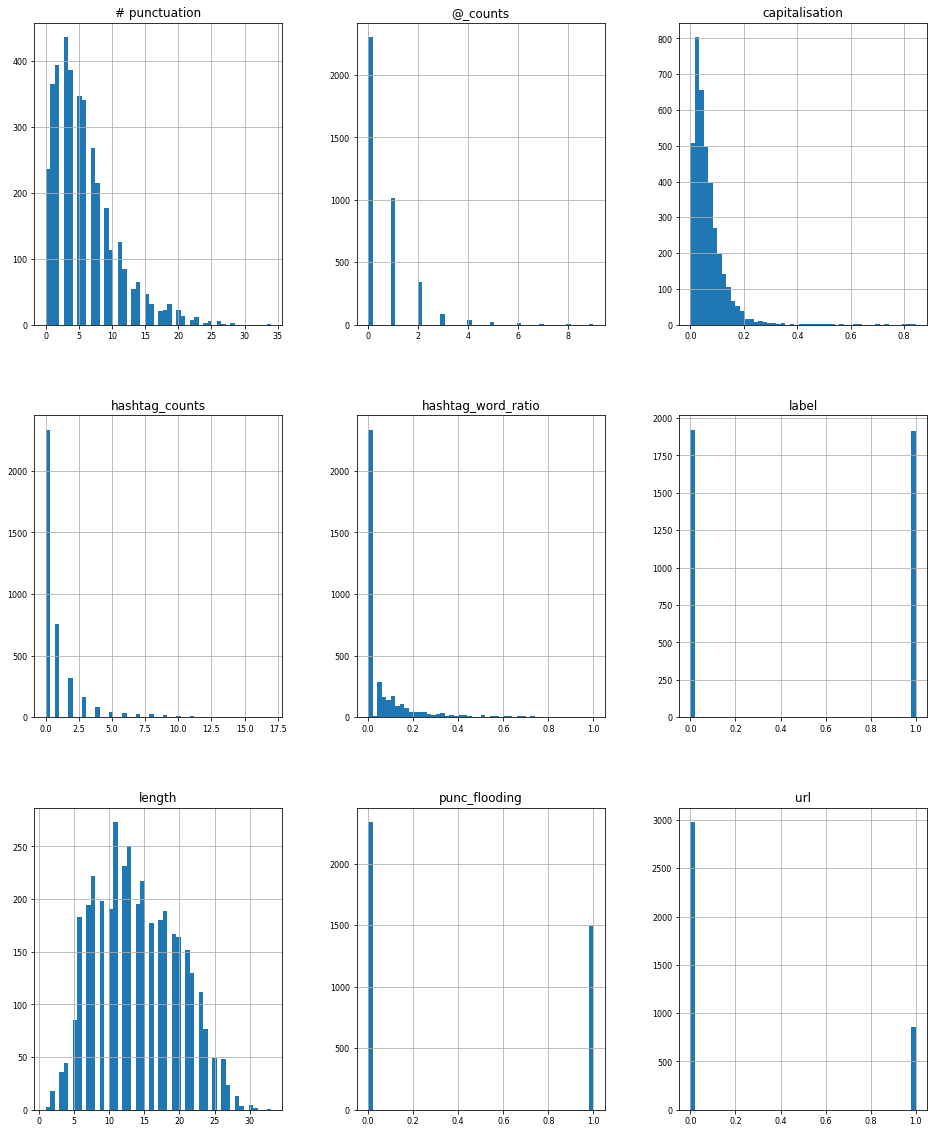

In [22]:
lexical_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# lexical_df['punc_count'].describe()

In [23]:
lexical_df['label'].value_counts()
# lexical_df[lexical_df['label']==1]['length']

0    1923
1    1911
Name: label, dtype: int64

## Punctuation Histogram

In [24]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='# punctuation', hue='tweet_label', data=lexical_df, palette="Set2");

ValueError: Could not interpret input 'tweet_label'

## Hashtag-to-word Ratio Histogram

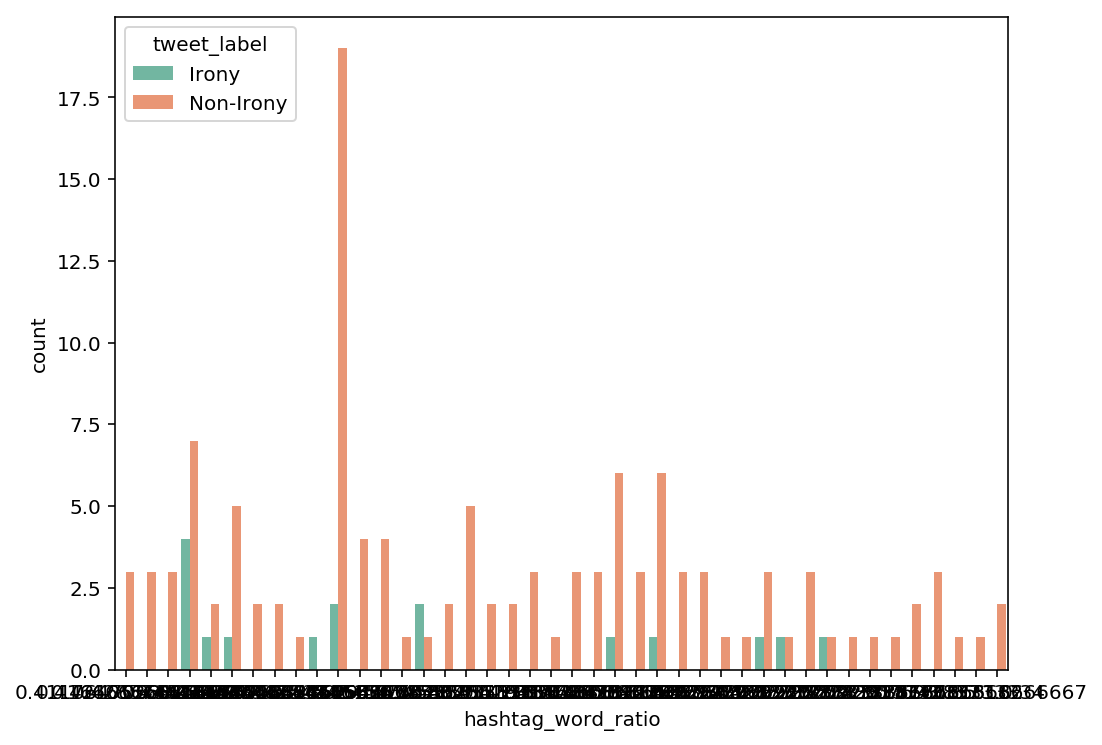

In [692]:
%config InlineBackend.figure_format ='retina'

plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='hashtag_word_ratio', hue='tweet_label', data=lexical_df[lexical_df['hashtag_word_ratio']>0.4], palette="Set2");

# sns.distplot(lexical_df[lexical_df['label']==0]['length'], bins=20, kde=False, rug=True);

In [683]:
# sns.pairplot(lexical_df)

## Prepare train and test df for classification

In [25]:
y_train = lexical_df['label']
lexical_df = lexical_df.drop(['label'], axis=1)

In [26]:
test_lex_df = lexical_feature_extract(test_df)
y_test = test_lex_df['label']
test_lex_df = test_lex_df.drop(['label'], axis = 1)

## Random Forest Classifier

In [29]:
# cross-validation on train
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Example of cross-validation
rf = RandomForestClassifier(n_estimators=10)

score = cross_val_score(rf, lexical_df, y_train, cv=10, scoring = "accuracy")
print('CROSS VALIDATION')
print("Score:", score)
print("Mean:", score.mean())
print("std:", score.std())

rf.fit(lexical_df, y_train)
y_pred = rf.predict(test_lex_df)
print(metrics.classification_report(y_test, y_pred))

CROSS VALIDATION
Score: [0.55584416 0.53645833 0.6015625  0.61096606 0.5691906  0.60835509
 0.5770235  0.60835509 0.57441253 0.59791123]
Mean: 0.58400790883942
std: 0.02414196195756088
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       473
           1       0.55      0.60      0.57       311

    accuracy                           0.65       784
   macro avg       0.64      0.64      0.64       784
weighted avg       0.65      0.65      0.65       784



In [30]:
feat_labels = list(lexical_df)
for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)

('capitalisation', 0.40343463696456394)
('url', 0.022888925640700684)
('hashtag_counts', 0.03786670696567614)
('@_counts', 0.05858229688075124)
('length', 0.23315010802648733)
('hashtag_word_ratio', 0.08258975370468524)
('# punctuation', 0.14539454281029524)
('punc_flooding', 0.016093029006840193)


## Confusion Matrix

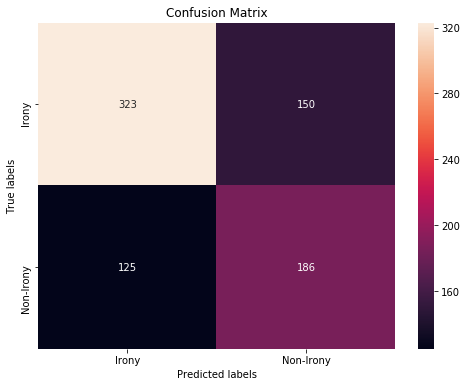

In [31]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, y_pred)
# rf_cm

def plotCM(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt="d"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Irony', 'Non-Irony']); ax.yaxis.set_ticklabels(['Irony', 'Non-Irony']);
plotCM(rf_cm)

In [32]:
# rf.get_params()

## Gaussian NB

In [225]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn import metrics

gnb = GaussianNB()
score = []
# kfold = KFold(n_splits=10, random_state=1, shuffle=True)
# for train, test in kfold.split(lexical_df):
#     train_tf_idf = tweet_vectorizer.fit_transform(clean_data_df['clean_tweet'][train])
gnb.fit(lexical_df, y_train)
y_pred = gnb.predict(test_lex_df)
print(metrics.accuracy_score(y_test, y_pred))

0.5688775510204082


## SVM as it was in the paper

In [33]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [34]:
svc_param_selection(lexical_df, y_train, 5)

{'C': 1, 'gamma': 0.1}

In [35]:

clf = svm.SVC(C=1, gamma = 0.1, kernel = 'rbf')
clf.fit(lexical_df, y_train)
y_pred = clf.predict(test_lex_df)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits = 4))

0.6683673469387755
              precision    recall  f1-score   support

           0     0.8000    0.6004    0.6860       473
           1     0.5594    0.7717    0.6486       311

    accuracy                         0.6684       784
   macro avg     0.6797    0.6861    0.6673       784
weighted avg     0.7046    0.6684    0.6712       784



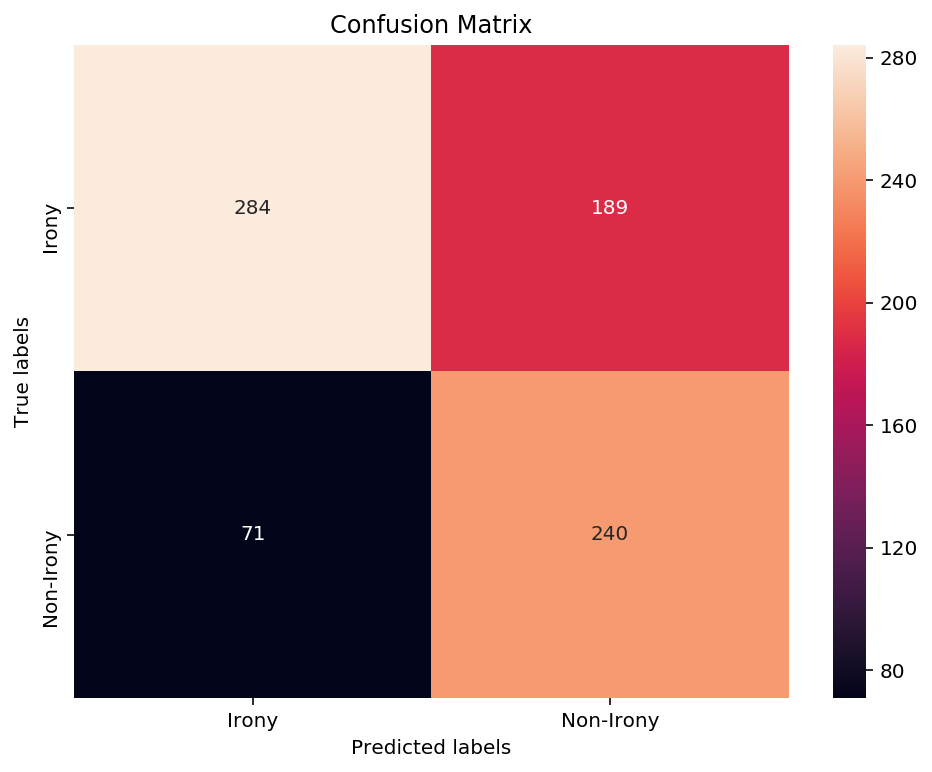

In [37]:
%config InlineBackend.figure_format ='retina'
svm_cm = confusion_matrix(y_test, y_pred)
plotCM(svm_cm)